# Unit cost

This section computes engineering, tooling, manufacturing labour, and many other costs associated with developing, certifying, and producing the example airplane. These costs are combined to compute minimum selling price for the airplane. Finally, a break-even analysis is performed to determine an appropriate unit cost for the airplane. The first step is to estimate the number of work hours for engineering, tooling, and manufacturing using the statistical relations. Then, the dollar amount can be computed by multiplying the number of hours by appropriate rates in dollars per hour. Refer to section 2.2 in Gudmundsson for more details. The following subsections compute the work hours and the corresponding costs.

Various quantities are required for computing the cost. Below table summarizes the quantities used in cost estimation. Note that the structural weight of the airframe consists of empty weight minus engine, avionics, seats, furnishings, control systems, and other components. In this demonstration, it is computed as 65% of the empty weight but it can be directly obtained from weight and balance studies. The testing and certification cost depends on the number of prototypes built before actual production starts. In this section, the number of prototypes is assumed to be 3.

The cost relations outlined in Gudmundsson are referenced at 2012 dollar value. This needs to be updated to current dollar value using consumer price index (CPI) which measures average change in price over time. The CPI factor is calculated using US Bureau of Labor Statistics' [inflation calculator](https://www.bls.gov/data/inflation_calculator.htm). Finally, the dollar rate per hour for engineering, tooling, and manufacturing is set to 92, 61, and 53 dollars/hr, respectively, based on the values provided in Gudmundsson's book.

<div style="width:75%; margin: auto;">

Parameter | Value | Source
----- | :---: | :---:
Airframe weight | 2250 lbs | computed
Max level speed | 210 kts | V-n diagram
Aircraft produced in 5-year period | 1000 | assumed
Consumer price index | 1.4 | computed
Number of prototypes | 3 | assumed
Number of engines | 2 | mission requirement
Max engine power | 350 hp | from trade study
Propeller diameter | 6.25 ft | from trade study
Engineering rate | $92/hr | Gudmundsson, section 2.2.2
Tooling rate | $61/hr | Gudmundsson, section 2.2.2
Manufacturing rate | $53/hr | Gudmundsson, section 2.2.2

</div>

Below code block imports required libraries and defines above variables:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Variables
W_airframe = 2250 # lbs, get this value from weights
VH = 210 # ktas

N = 1000 # units for next 5 year
Qm = N/60 # production rate, per month
Np = 3 # number of prototypes

N_engine = 2 # number of engines
Pbhp = 701 / N_engine # bhp
Dp = 6.25 # ft

CPI = 1.4 # CPI factor
R_engg = 92 # $/hr
R_tool = 61 # $/hr
R_manf = 53 # $/hr

## Work hours

The work hours are estimated using equation 2.2, 2.3, and 2.4 from Gudmundsson's book. For brevity, equations are not reproduced here. In these equations, several fudge factors are used to accomodate factors such as amount of composites in airframe and certification type. Below code block defines these factors, refer to section 2.2.2 in Gudmundsson's book for further details.

In [2]:
# Fudges factors for work hour calculations
F_cert = 1 # 14 CFR Part 23
F_cf = 1
F_comp = 1 # all aluminium frame
F_press = 1 # no pressurization
F_taper = 1 # taper wing

Below code block computes work hours for engineering, tooling, and manufacturing. It also computes average time required to build an airplane. Note that this average is computed over a 5-year period, it may take a lot longer to build a single plane during early days of production.

In [3]:
# engineering hours
H_eng = 0.0396 * W_airframe**0.791 * VH**1.526 * N**0.183 * F_cert * F_cf * F_comp * F_press

# tooling hours
H_tool = 1.0032 * W_airframe**0.764 * VH**0.899 * N**0.178 * Qm**0.066 * F_taper * F_cf * F_comp * F_press

# manufacturing hours
H_manf = 9.6613 * W_airframe**0.74 * VH**0.543 * N**0.524 * F_cert * F_cf * F_comp

# average time
avg_build_time_unit = H_manf / N

print(f"Engineering hours: {int(H_eng):,} hrs")
print(f"Tooling hours: {int(H_tool):,} hrs")
print(f"Manufacturing hours: {int(H_manf):,} hrs")
print(f"Average build time for an airplane: {int(avg_build_time_unit):,} hrs")

Engineering hours: 219,774 hrs
Tooling hours: 183,980 hrs
Manufacturing hours: 1,988,912 hrs
Average build time for an airplane: 1,988 hrs


## Fixed cost

Based on the work hours comptued in previous section, different costs are computed using equations 2.5 - 2.13 in Gudmundsson's book. Below code block computes **fixed** cost i.e the cost associated with engineering, development, flight testing, and tooling. These costs are also known as **non-recurring** costs.

In [15]:
# engineering cost
C_engg = 2.0969 * H_eng * R_engg * CPI

# development cost
C_dev = 0.06458 * W_airframe**0.873 * VH**1.89 * Np**0.346 * CPI \
    * F_cert * F_cf * F_comp * F_press

# flight test operations cost
C_ft = 0.009646 * W_airframe**1.16 * VH**1.3718 * Np**1.281 * CPI * F_cert

# tooling cost
C_tool = 2.0969 * H_tool * R_tool * CPI

# fixed cost or certification cost
C_cert = C_engg + C_dev + C_ft + C_tool

print(f"Engineering cost: ${int(C_engg):,}")
print(f"Development support cost: ${int(C_dev):,}")
print(f"Flight test operations cost: ${int(C_ft):,}")
print(f"Tooling cost: ${int(C_tool):,}")
print(f"Total fixed cost: ${int(C_cert):,}")

Engineering cost: $59,356,978
Development support cost: $2,733,756
Flight test operations cost: $654,364
Tooling cost: $32,946,381
Total fixed cost: $95,691,480


## Variable cost

Below code block computes variable costs i.e. the cost which depends on the number of units produced. These costs are also known as **recurring** costs. It also computes the variable cost per unit airplane produced.

In [5]:
# manufacturing cost
C_manf = 2.0969 * H_manf * R_manf * CPI

# quality control cost
C_qc = 0.13 * C_manf * F_cert * F_comp

# material cost
C_mat = 24.896 * W_airframe**0.689 * VH**0.624 * N**0.792 * CPI * F_cert * F_cf * F_press

### per aircraft cost

# avionics
C_avionics = CPI * 15000 

# engine
C_engine = 174 * N_engine * Pbhp * CPI

# propellor
C_prop = 209.66 * N_engine * CPI * Dp**2 * (Pbhp/Dp)**0.12

# avg unit cost
unit_var_cost = (C_manf + C_qc + C_mat) / N + C_engine + C_prop + C_avionics

print(f"Manufacturing labor cost: ${int(C_manf):,}")
print(f"Quality control cost: ${int(C_qc):,}")
print(f"Material cost: ${int(C_mat):,}")
print(f"Avionics cost for each unit: ${int(C_avionics):,}")
print(f"Engine cost for each unit: ${int(C_engine):,}")
print(f"Propeller cost for each unit: ${int(C_prop):,}")
print(f"Unit variable cost: ${int(unit_var_cost):,}")

Manufacturing labor cost: $309,454,878
Quality control cost: $40,229,134
Material cost: $47,530,918
Avionics cost for each unit: $21,000
Engine cost for each unit: $170,763
Propeller cost for each unit: $37,178
Unit variable cost: $626,156


## Unit cost & Selling price

Once fixed and variable costs are computed, next step is to estimate the minimum selling price. The total unit cost (also known as the minimum cost to produce an airplane) is simply the sum of the unit fixed and variable cost. The minimum selling price is obtained by adding manufacturer liability insurance to this unit total cost. Based on the values provided in Gudmundsson, approximately 15% liability insurance is assumed.

Below code block computes unit cost and minimum selling price:

In [6]:
# total_unit_cost
total_unit_cost = C_cert / N + unit_var_cost

# liability insurance
liability_ins = round(0.15 * total_unit_cost,-4)

# minimum selling price
min_selling_price = total_unit_cost + liability_ins

print(f"Unit total cost: ${int(total_unit_cost):,}")
print(f"Liability insurance: ${int(liability_ins):,}")
print(f"Minimum selling price: ${int(min_selling_price):,}")

Unit total cost: $721,848
Liability insurance: $110,000
Minimum selling price: $831,848


Below table summarizes the cost analysis for the example airplane:

<div style="width:55%; margin: auto;">

Parameter | Cost/unit ($)
----- | :---:
Engineering | 59,357
Development support | 2,734
Flight test operations | 654
Tooling | 32,946
**Fixed cost** | 95,691
Manufacturing labor | 309,455
Quality control | 40,229
Material | 47,531
Avionics | 21,000
Engines | 170,763
Propeller | 37,178
**Variable cost** | 626,156
**Total cost to produce** | 721,847
Manufacturer's liability insurance | 110,000
**Minimum selling price** | 831,847
</div>

## Break-even

Once fixed and variable costs are known, break-even analysis can be performed. The number of units to be sold for break-even can be computed as

$$
    N_{BE} = \frac{\text{total fixed cost}}{\text{unit sales price} - \text{unit cost}}.
$$

The total fixed cost is already known. The unit cost is simply the sum of the unit variable cost and liability insurance. Using above equation, $N_{BE}$ can be computed by determining a suitable unit sales price. Below code block graphically illustrates $N_{BE}$ for three different unit sales prices based on a profit margin of 0%, 10%, and 20%:

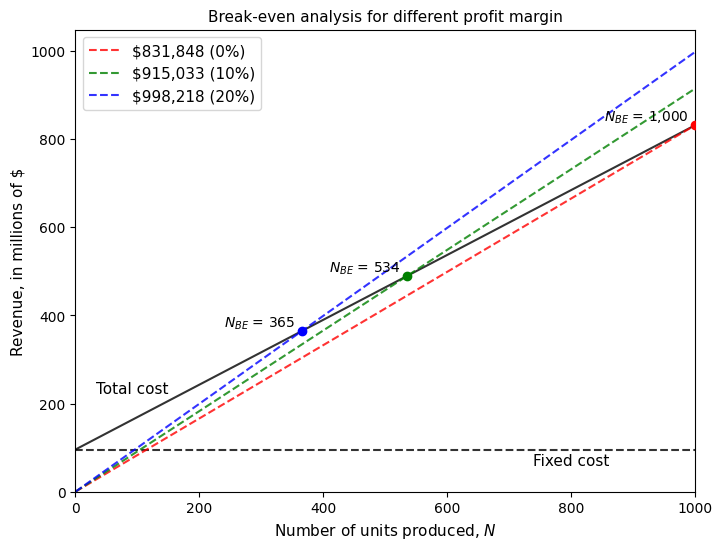

In [51]:
# Variables
num_aircraft = np.linspace(0,N,N+1,dtype=int)
total_cost = C_cert + (unit_var_cost + liability_ins) * num_aircraft
total_cost = total_cost/1e6
profit = np.array([0, 0.1, 0.2])
unit_price = min_selling_price * np.array([1,1.1,1.2])

colors = ["r", "g", "b"]
fs = 11
alpha = 0.8

# Plotting
fig, ax = plt.subplots(figsize=(8,6))

ax.axhline(y=C_cert/1e6, linestyle="--", color="k", alpha=alpha)
ax.plot(num_aircraft, total_cost, "k", alpha=alpha)

for i, price in enumerate(unit_price):
    total_revenue = price * num_aircraft / 1e6
    N_BE = C_cert / (price - (unit_var_cost + liability_ins))
    ax.plot(num_aircraft, total_revenue, f"{colors[i]}--", label=f"${int(price):,} ({int(profit[i]*100):,}%)", alpha=alpha)
    ax.scatter(N_BE, N_BE*price/1e6, zorder=10, color=colors[i])
    ax.annotate("$N_{BE}$ = " + f"{int(N_BE):,}", (N_BE-10,N_BE*price/1e6), ha="right", va="bottom", zorder=10)

# Annotations
ax.annotate("Fixed cost", (800,C_cert/1e6-25), fontsize=fs, ha="center", va="center")
ax.annotate("Total cost", (150,250), fontsize=fs, ha="right", va="top")

# Asthetics
ax.legend(fontsize=fs)
ax.set_xlim(left=0, right=N)
ax.set_ylim(bottom=0)
ax.set_title("Break-even analysis for different profit margin", fontsize=fs)
ax.set_xlabel("Number of units produced, $N$", fontsize=fs)
_ = ax.set_ylabel("Revenue, in millions of $", fontsize=fs)

When there is no profit i.e. aircraft is sold at its minimum selling price, the $N_{BE}$ is equal to the number of airplanes assumed to be produced over 5-year period. As the profit margin increases, the number of units for break-even also decreases. However, one should carefully determine the selling price based on market conditions. Based on the above analysis, for a unit price of $900,000, the number of aircraft to be sold for recovering the cost wil be approximately 550. This concludes the unit cost estimation, next step is to determine the operating costs.